<a href="https://colab.research.google.com/github/ML-Bioinfo-CEITEC/ECCB2021/blob/main/notebooks/08_RNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!wget https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/train_set_1_1.txt
!wget https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/test_set_1_1.txt

--2021-07-23 04:09:36--  https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/train_set_1_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63000000 (60M) [text/plain]
Saving to: ‘train_set_1_1.txt.1’

train_set_1_1.txt.1 100%[===================>]  60.08M   158MB/s    in 0.4s    

2021-07-23 04:09:38 (158 MB/s) - ‘train_set_1_1.txt.1’ saved [63000000/63000000]

--2021-07-23 04:09:38--  https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/test_set_1_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting res

In [64]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
nucleo_dic = {
    "A": 0,
    "C": 1,
    "T": 2,
    "G": 3,
    "N": 4,
}
def create_dataset_from_txt(filename, limit):
  df = pd.read_csv(filename, sep='\t', names=['sequence', 'label'])

  labels = np.array(list(map((lambda x: 1 if x == 'positive' else 0), list(df['label']))))[:limit]
  data_list = df['sequence'].tolist()

  dataset_numeric = [[nucleo_dic[letter] for letter in sequence] for sequence in data_list][:limit] 
  dataset_onehot = tf.one_hot(dataset_numeric, depth=5)

  dataset = tf.data.Dataset.from_tensor_slices((dataset_onehot, labels))
  return dataset.shuffle(buffer_size=10000).batch(batch_size=256)


train_dataset = create_dataset_from_txt("train_set_1_1.txt", limit=30000)
valid_dataset = create_dataset_from_txt("test_set_1_1.txt", limit=10000)


In [65]:
for x,y in train_dataset.take(1):
  print(x.shape, x)
  print(y.shape, y)


(256, 200, 5) tf.Tensor(
[[[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  ...
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  ...
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 1. 0.]
  [1. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  ...
  [1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0.]]

 ...

 [[0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  ...
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0.]
  ...
  [0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 0. 1. 0. 0.]]], shape=(256, 200, 5), dtype=float32)
(256,) tf.Tensor(
[0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1
 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') #New activation function and loss!
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
118/118 [==============================] - 16s 129ms/step - loss: 0.6534 - accuracy: 0.6120 - val_loss: 0.6609 - val_accuracy: 0.5885
Epoch 2/10
118/118 [==============================] - 16s 131ms/step - loss: 0.6122 - accuracy: 0.6572 - val_loss: 0.6465 - val_accuracy: 0.6057
Epoch 3/10
118/118 [==============================] - 16s 134ms/step - loss: 0.5879 - accuracy: 0.6864 - val_loss: 0.5439 - val_accuracy: 0.7423
Epoch 4/10
118/118 [==============================] - 15s 125ms/step - loss: 0.6216 - accuracy: 0.6278 - val_loss: 0.6831 - val_accuracy: 0.5463
Epoch 5/10
118/118 [==============================] - 15s 126ms/step - loss: 0.6807 - accuracy: 0.5552 - val_loss: 0.6796 - val_accuracy: 0.5465
Epoch 6/10
118/118 [==============================] - 15s 131ms/step - loss: 0.6782 - accuracy: 0.5528 - val_loss: 0.6776 - val_accuracy: 0.5505
Epoch 7/10
118/118 [==============================] - 16s 135ms/step - loss: 0.6734 - accuracy: 0.5607 - val_loss: 0.6760 - val_ac

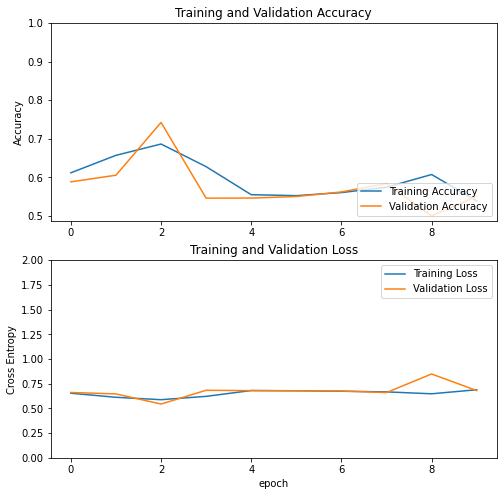

In [67]:
def plot_metrics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,2.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

plot_metrics(history)

LSTM (slides)

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
118/118 [==============================] - 4s 20ms/step - loss: 0.4538 - accuracy: 0.7969 - val_loss: 0.3784 - val_accuracy: 0.8838
Epoch 2/10
118/118 [==============================] - 2s 16ms/step - loss: 0.3511 - accuracy: 0.8895 - val_loss: 0.2980 - val_accuracy: 0.9084
Epoch 3/10
118/118 [==============================] - 2s 16ms/step - loss: 0.3344 - accuracy: 0.8884 - val_loss: 0.2758 - val_accuracy: 0.9148
Epoch 4/10
118/118 [==============================] - 2s 16ms/step - loss: 0.2997 - accuracy: 0.9022 - val_loss: 0.3342 - val_accuracy: 0.9040
Epoch 5/10
118/118 [==============================] - 2s 16ms/step - loss: 0.3661 - accuracy: 0.8685 - val_loss: 0.2772 - val_accuracy: 0.9154
Epoch 6/10
118/118 [==============================] - 2s 15ms/step - loss: 0.3015 - accuracy: 0.9079 - val_loss: 0.3198 - val_accuracy: 0.9048
Epoch 7/10
118/118 [==============================] - 2s 15ms/step - loss: 0.4556 - accuracy: 0.7863 - val_loss: 0.7110 - val_accuracy: 0.5062

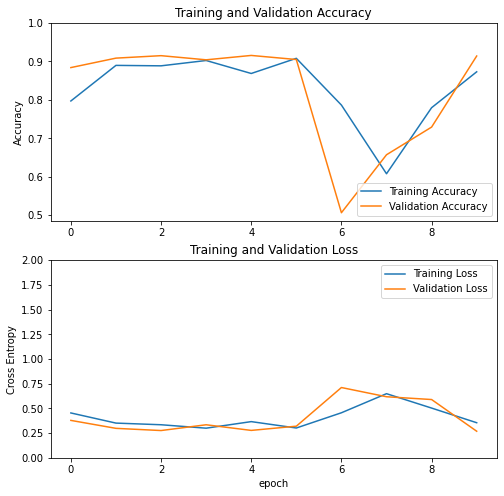

In [69]:
plot_metrics(history)

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # <---  change in learning rate, default is 0.001 https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
118/118 [==============================] - 4s 19ms/step - loss: 0.6769 - accuracy: 0.5889 - val_loss: 0.6007 - val_accuracy: 0.6810
Epoch 2/10
118/118 [==============================] - 2s 15ms/step - loss: 0.4497 - accuracy: 0.8211 - val_loss: 0.3593 - val_accuracy: 0.8671
Epoch 3/10
118/118 [==============================] - 2s 15ms/step - loss: 0.3304 - accuracy: 0.8691 - val_loss: 0.2834 - val_accuracy: 0.8844
Epoch 4/10
118/118 [==============================] - 2s 16ms/step - loss: 0.2769 - accuracy: 0.8854 - val_loss: 0.2485 - val_accuracy: 0.8983
Epoch 5/10
118/118 [==============================] - 2s 15ms/step - loss: 0.2655 - accuracy: 0.8981 - val_loss: 0.2640 - val_accuracy: 0.9070
Epoch 6/10
118/118 [==============================] - 2s 15ms/step - loss: 0.2695 - accuracy: 0.8959 - val_loss: 0.2341 - val_accuracy: 0.9121
Epoch 7/10
118/118 [==============================] - 2s 15ms/step - loss: 0.2686 - accuracy: 0.8938 - val_loss: 0.2296 - val_accuracy: 0.9160

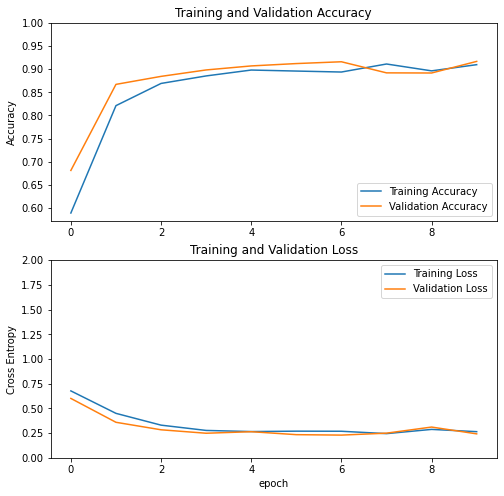

In [71]:
plot_metrics(history)


Bidirectional LSTM

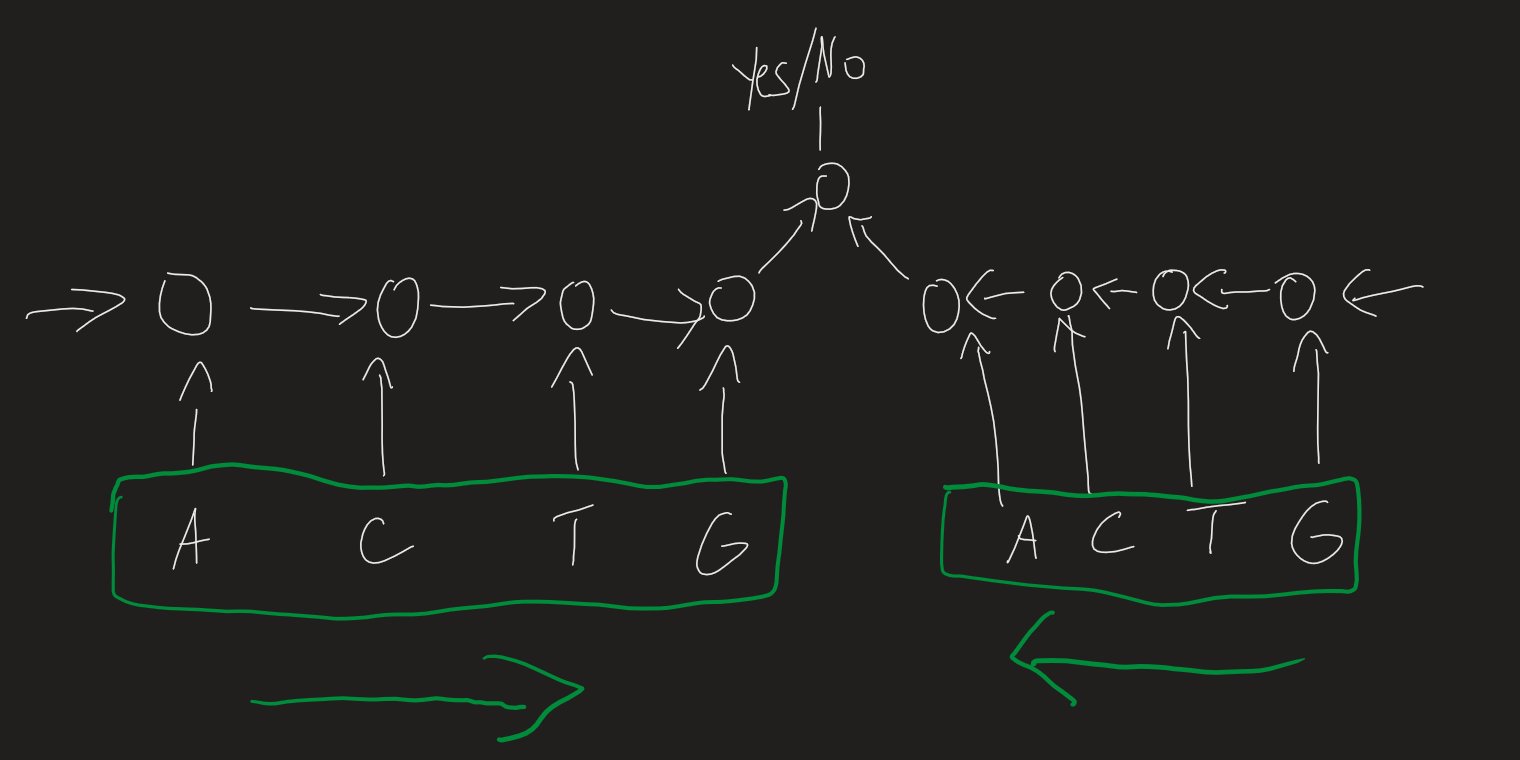

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)


Epoch 1/10
118/118 [==============================] - 7s 35ms/step - loss: 0.6513 - accuracy: 0.6287 - val_loss: 0.4207 - val_accuracy: 0.8730
Epoch 2/10
118/118 [==============================] - 3s 28ms/step - loss: 0.3335 - accuracy: 0.8868 - val_loss: 0.2828 - val_accuracy: 0.9067
Epoch 3/10
118/118 [==============================] - 3s 29ms/step - loss: 0.2860 - accuracy: 0.9042 - val_loss: 0.2714 - val_accuracy: 0.9075
Epoch 4/10
118/118 [==============================] - 3s 28ms/step - loss: 0.2664 - accuracy: 0.9109 - val_loss: 0.2547 - val_accuracy: 0.9167
Epoch 5/10
118/118 [==============================] - 3s 29ms/step - loss: 0.2721 - accuracy: 0.9080 - val_loss: 0.2374 - val_accuracy: 0.9217
Epoch 6/10
118/118 [==============================] - 3s 28ms/step - loss: 0.2487 - accuracy: 0.9156 - val_loss: 0.2408 - val_accuracy: 0.9164
Epoch 7/10
118/118 [==============================] - 3s 27ms/step - loss: 0.2444 - accuracy: 0.9144 - val_loss: 0.2283 - val_accuracy: 0.9229

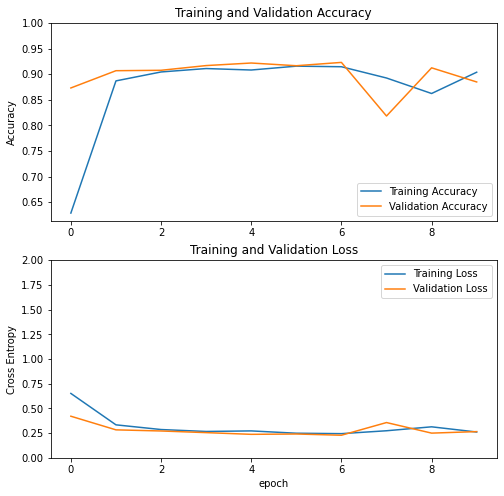

In [73]:
plot_metrics(history)